In [1]:
import pandas as pd
from sklearn.datasets import load_diabetes, load_wine
from sklearn.model_selection import train_test_split as tts

In [2]:
diabetes=pd.DataFrame(load_diabetes().data, columns=load_diabetes().feature_names)
diabetes['target']=load_diabetes().target

diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
wine=pd.DataFrame(load_wine().data, columns=load_wine().feature_names)
wine['target']=load_wine().target

wine.target.unique()

array([0, 1, 2])

In [4]:
X_train_d, X_test_d, y_train_d, y_test_d = tts(diabetes.drop('target', axis=1), diabetes.target)

In [5]:
X_train_v, X_test_v, y_train_v, y_test_v = tts(wine.drop('target', axis=1), wine.target)

# Gradiente Descendente Estocástico SGD

![](data/grad1.png)

![](data/grad2.jpg)

Es una derivación numérica. Lo estocástico viene de la elección de la muestra, en vez de coger todos los datos solo coge uno. Reduce el costo computacional. Sirve como regresor o como clasificador.

##### SGDR

In [6]:
from sklearn.linear_model import SGDRegressor as SGDR

In [7]:
sgdr=SGDR(max_iter=8000)

sgdr.fit(X_train_d, y_train_d)

train_score=sgdr.score(X_train_d, y_train_d) #R2
test_score=sgdr.score(X_test_d, y_test_d)

print ('train R2:',train_score, '-- test R2:', test_score)

train R2: 0.46433705303018913 -- test R2: 0.5975451048580351


In [8]:
sgdr

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=8000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

##### SGDC

In [9]:
from sklearn.linear_model import SGDClassifier as SGDC

In [10]:
sgdc=SGDC(max_iter=8000)

sgdc.fit(X_train_v, y_train_v)

train_score=sgdc.score(X_train_v, y_train_v) # Accuracy
test_score=sgdc.score(X_test_v, y_test_v)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.6015037593984962 -- test Acc: 0.6222222222222222


In [11]:
sgdc

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=8000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

# Naive Bayes

$$P(clase|data)= \frac{P(data|clase)·P(clase)}{P(data)}$$




+ P(data|clase) es $N(\mu, \sigma)$ (datos normalizados)

+ P(clase) es el a priori 

+ P(data) no se calcula

+ P(clase|data) el a posteriori, lo que se busca

Lo de Naive viene de la suposición de independencia condicional entre predictores, lo cuál no suele ser verdad.


$$\hat{y}=argmax [P(y) \prod_{i=1}^{n} P(x_i|y)]$$

### GNB (Gaussian Naive Bayes)

In [12]:
from sklearn.naive_bayes import GaussianNB as GNB

gnb=GNB()

gnb.fit(X_train_v, y_train_v)

train_score=gnb.score(X_train_v, y_train_v) # Accuracy
test_score=gnb.score(X_test_v, y_test_v)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.9849624060150376 -- test Acc: 1.0


In [13]:
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

### MNB (Multinomial Naive Bayes)

In [14]:
from sklearn.naive_bayes import MultinomialNB as MNB

mnb=MNB()

mnb.fit(X_train_v, y_train_v)

train_score=mnb.score(X_train_v, y_train_v) # Accuracy
test_score=mnb.score(X_test_v, y_test_v)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.8421052631578947 -- test Acc: 0.8888888888888888


In [15]:
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### CNB (Complement Naive Bayes)

In [16]:
from sklearn.naive_bayes import ComplementNB as CNB

cnb=CNB()

cnb.fit(X_train_v, y_train_v)

train_score=cnb.score(X_train_v, y_train_v) # Accuracy
test_score=cnb.score(X_test_v, y_test_v)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.6541353383458647 -- test Acc: 0.6666666666666666


In [17]:
cnb

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

### BNB (Bernoulli Naive Bayes)

In [18]:
from sklearn.naive_bayes import BernoulliNB as BNB

bnb=BNB()

bnb.fit(X_train_v, y_train_v)

train_score=bnb.score(X_train_v, y_train_v) # Accuracy
test_score=bnb.score(X_test_v, y_test_v)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.40601503759398494 -- test Acc: 0.37777777777777777


In [19]:
bnb

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

# K-Nearest Neighbors

![](data/knn.png)

Este modelo se basa en al idea de vecindario, según sea lo que rodea al nuevo dato, así se clasificará.

Básicamente se trata de calcular las distancias (euclídea o L1 normalmente) entre los datos, para asignar el valor (etiqueta) al nuevo dato según sean sus vecinos.

Se suele tomar $k$ como un número impar para poder tomar una decisión en caso de empate.

#### KNNR

In [20]:
from sklearn.neighbors import KNeighborsRegressor as KNNR

In [21]:
knnr=KNNR(n_neighbors=7)
knnr.fit(X_train_d, y_train_d)

train_score=knnr.score(X_train_d, y_train_d) #R2
test_score=knnr.score(X_test_d, y_test_d)

print ('train R2:',train_score, '-- test R2:', test_score)

train R2: 0.503972532161827 -- test R2: 0.5400907717444046


In [22]:
knnr

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

#### KNNC

In [23]:
from sklearn.neighbors import KNeighborsClassifier as KNNC

In [24]:
knnc=KNNC(n_neighbors=5, metric='euclidean')
knnc.fit(X_train_v, y_train_v)

train_score=knnc.score(X_train_v, y_train_v) #R2
test_score=knnc.score(X_test_v, y_test_v)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 0.7819548872180451 -- test Acc: 0.8


In [25]:
knnc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Ensemble Models


### Bagging  -  Boosting


![](data/boost.png)

In [26]:
# ejemplo

knnc=KNNC(n_neighbors=5, metric='euclidean')
knnc.fit(X_train_v, y_train_v)
y_pred=knnc.predict(X_test_v)

knnc2=KNNC(n_neighbors=5, metric='euclidean')
knnc2.fit([y_pred for i in range(45)], y_test_v)

knnc2.predict([y_pred for i in range(45)])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

#### Gradient Boost Regressor

In [27]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [28]:
gbr=GBR()
gbr.fit(X_train_d, y_train_d)

train_score=gbr.score(X_train_d, y_train_d) #R2
test_score=gbr.score(X_test_d, y_test_d)

print ('train R2:',train_score, '-- test R2:', test_score)

train R2: 0.8438096738773168 -- test R2: 0.5793028475108932


In [29]:
gbr

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

#### Gradient Boost Classifier

In [30]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [31]:
gbc=GBC()
gbc.fit(X_train_v, y_train_v)

train_score=gbc.score(X_train_v, y_train_v) #R2
test_score=gbc.score(X_test_v, y_test_v)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 1.0 -- test Acc: 0.9777777777777777


## Extreme Gradient Boosting

In [32]:
# !pip3 install xgboost

#### XGBR

In [33]:
from xgboost import XGBRegressor as XGBR

xgbr=XGBR()
xgbr.fit(X_train_d, y_train_d)

train_score=xgbr.score(X_train_d, y_train_d) #R2
test_score=xgbr.score(X_test_d, y_test_d)

print ('train R2:',train_score, '-- test R2:', test_score)

[12:44:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train R2: 0.8088588862645718 -- test R2: 0.558125147251999


/Users/data/Library/Python/3.7/lib/python/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [34]:
xgbr

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

#### XGBC

In [35]:
from xgboost import XGBClassifier as XGBC

xgbc=XGBC()
xgbc.fit(X_train_v, y_train_v)

train_score=xgbc.score(X_train_v, y_train_v) 
test_score=xgbc.score(X_test_v, y_test_v)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 1.0 -- test Acc: 0.9777777777777777


### Catboost

##### CTR

In [36]:
from catboost import CatBoostRegressor as CTR

ctr=CTR(verbose=0)
ctr.fit(X_train_d, y_train_d)

train_score=ctr.score(X_train_d, y_train_d) #R2
test_score=ctr.score(X_test_d, y_test_d)

print ('train R2:',train_score, '-- test R2:', test_score)

train R2: 0.9806705936614191 -- test R2: 0.5517019744814187


In [37]:
ctr  # sus hiperparametros en https://catboost.ai/

##### CTC

In [38]:
from catboost import CatBoostClassifier as CTC

ctc=CTC(verbose=0)
ctc.fit(X_train_v, y_train_v)

train_score=ctc.score(X_train_v, y_train_v) 
test_score=ctc.score(X_test_v, y_test_v)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 1.0 -- test Acc: 1.0


## LightGBM

In [39]:
#!pip3 install lightgbm

#### LGBR

In [40]:
from lightgbm import LGBMRegressor as LGBMR

lgbmr=LGBMR()
lgbmr.fit(X_train_d, y_train_d)

train_score=lgbmr.score(X_train_d, y_train_d) #R2
test_score=lgbmr.score(X_test_d, y_test_d)

print ('train R2:',train_score, '-- test R2:', test_score)

train R2: 0.9059514951330477 -- test R2: 0.45183166261278396


In [41]:
lgbmr

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#### LGBC

In [42]:
from lightgbm import LGBMClassifier as LGBMC

lgbmc=LGBMC(verbose=0)
lgbmc.fit(X_train_v, y_train_v)

train_score=lgbmc.score(X_train_v, y_train_v) 
test_score=lgbmc.score(X_test_v, y_test_v)

print ('train Acc:',train_score, '-- test Acc:', test_score)

train Acc: 1.0 -- test Acc: 1.0


In [43]:
lgbmc

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=0)

# H2o


https://www.h2o.ai/

In [44]:
import h2o
from h2o.automl import H2OAutoML

In [45]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_222"; OpenJDK Runtime Environment (AdoptOpenJDK)(build 1.8.0_222-b10); OpenJDK 64-Bit Server VM (AdoptOpenJDK)(build 25.222-b10, mixed mode)
  Starting server from /Users/data/Library/Python/3.7/lib/python/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/xx/_vmf5v917hb0dgxz9fw65cnh0000gn/T/tmpevp_k0rq
  JVM stdout: /var/folders/xx/_vmf5v917hb0dgxz9fw65cnh0000gn/T/tmpevp_k0rq/h2o_data_started_from_python.out
  JVM stderr: /var/folders/xx/_vmf5v917hb0dgxz9fw65cnh0000gn/T/tmpevp_k0rq/h2o_data_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Mexico_City
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.10
H2O cluster version age:,5 months and 23 days !!!
H2O cluster name:,H2O_from_python_data_kejhad
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [46]:
url='https://s3.amazonaws.com/erin-data/higgs/'


# parsear datos a h2o
train=h2o.import_file(url + 'higgs_train_10k.csv')
test=h2o.import_file(url + 'higgs_test_5k.csv')


X=train.columns
y='response'
X.remove(y)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [47]:
# factor para clasificacion binaria

train[y]=train[y].asfactor()
test[y]=test[y].asfactor()

In [48]:
# 20 modelos

aml=H2OAutoML(max_models=20, seed=1)
aml.train(x=X, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [49]:
lb=aml.leaderboard

lb.head(rows=lb.nrows)

model_id,auc,logloss,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200430_124508,0.790773,0.550295,0.315257,0.431716,0.186378
StackedEnsemble_BestOfFamily_AutoML_20200430_124508,0.789645,0.550905,0.313189,0.432131,0.186737
XGBoost_grid_1_AutoML_20200430_124508_model_4,0.785011,0.556344,0.318063,0.434527,0.188814
XGBoost_3_AutoML_20200430_124508,0.784844,0.557121,0.311898,0.434717,0.188979
XGBoost_2_AutoML_20200430_124508,0.784043,0.555627,0.312643,0.434452,0.188748
XGBoost_grid_1_AutoML_20200430_124508_model_3,0.784037,0.558918,0.327596,0.435303,0.189489
XGBoost_grid_1_AutoML_20200430_124508_model_1,0.783577,0.559298,0.336173,0.435577,0.189727
XGBoost_1_AutoML_20200430_124508,0.783156,0.55631,0.322884,0.434894,0.189132
GBM_5_AutoML_20200430_124508,0.780344,0.558723,0.334826,0.436138,0.190216
GBM_1_AutoML_20200430_124508,0.780286,0.560701,0.316822,0.43642,0.190462


In [50]:
aml.leader  # mejor modelo

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_AutoML_20200430_124508

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.10650946605525893
RMSE: 0.3263578803327092
LogLoss: 0.36394390778795854
Null degrees of freedom: 9999
Residual degrees of freedom: 9986
Null deviance: 13828.113387424273
Residual deviance: 7278.878155759171
AIC: 7306.878155759171
AUC: 0.9530689931652081
pr_auc: 0.9574066686102832
Gini: 0.9061379863304162

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.46266883041175016: 


,,0,1,Error,Rate
0,0,3831.0,874.0,0.1858,(874.0/4705.0)
1,1,371.0,4924.0,0.0701,(371.0/5295.0)
2,Total,4202.0,5798.0,0.1245,(1245.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.462669,0.887767,221.0
1,max f2,0.383789,0.928538,253.0
2,max f0point5,0.630102,0.898773,154.0
3,max accuracy,0.500292,0.876400,207.0
4,max precision,0.945924,1.000000,0.0
5,max recall,0.165414,1.000000,350.0
6,max specificity,0.945924,1.000000,0.0
7,max absolute_mcc,0.469901,0.753015,218.0
8,max min_per_class_accuracy,0.531416,0.874410,195.0
9,max mean_per_class_accuracy,0.528675,0.875155,196.0



Gains/Lift Table: Avg response rate: 52,95 %, avg score: 53,44 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.925078,1.888574,1.888574,1.000,0.932116,1.000000,0.932116,0.018886,0.018886,88.857413,88.857413
1,,2,0.02,0.918915,1.888574,1.888574,1.000,0.922051,1.000000,0.927083,0.018886,0.037771,88.857413,88.857413
2,,3,0.03,0.914263,1.888574,1.888574,1.000,0.916478,1.000000,0.923548,0.018886,0.056657,88.857413,88.857413
3,,4,0.04,0.910117,1.888574,1.888574,1.000,0.912098,1.000000,0.920686,0.018886,0.075543,88.857413,88.857413
4,,5,0.05,0.905256,1.888574,1.888574,1.000,0.907594,1.000000,0.918067,0.018886,0.094429,88.857413,88.857413
5,,6,0.10,0.883624,1.888574,1.888574,1.000,0.894631,1.000000,0.906349,0.094429,0.188857,88.857413,88.857413
6,,7,0.15,0.858595,1.881020,1.886056,0.996,0.870823,0.998667,0.894507,0.094051,0.282908,88.101983,88.605603
7,,8,0.20,0.830512,1.881020,1.884797,0.996,0.844980,0.998000,0.882126,0.094051,0.376959,88.101983,88.479698
8,,9,0.30,0.757385,1.790368,1.853321,0.948,0.796018,0.981333,0.853423,0.179037,0.555996,79.036827,85.332074
9,,10,0.40,0.667887,1.616619,1.794145,0.856,0.713009,0.950000,0.818320,0.161662,0.717658,61.661945,79.414542




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.18637843686143707
RMSE: 0.43171568984858205
LogLoss: 0.5502947079551636
Null degrees of freedom: 9999
Residual degrees of freedom: 9986
Null deviance: 13829.717313823481
Residual deviance: 11005.89415910327
AIC: 11033.89415910327
AUC: 0.7907729406062504
pr_auc: 0.8071853776255421
Gini: 0.5815458812125007

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.357244074646632: 


,,0,1,Error,Rate
0,0,2340.0,2365.0,0.5027,(2365.0/4705.0)
1,1,677.0,4618.0,0.1279,(677.0/5295.0)
2,Total,3017.0,6983.0,0.3042,(3042.0/10000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.357244,0.752240,267.0
1,max f2,0.175415,0.860944,352.0
2,max f0point5,0.584872,0.739462,165.0
3,max accuracy,0.519738,0.716600,192.0
4,max precision,0.940966,1.000000,0.0
5,max recall,0.064629,1.000000,395.0
6,max specificity,0.940966,1.000000,0.0
7,max absolute_mcc,0.543305,0.433341,182.0
8,max min_per_class_accuracy,0.525142,0.715197,189.0
9,max mean_per_class_accuracy,0.543305,0.717044,182.0



Gains/Lift Table: Avg response rate: 52,95 %, avg score: 52,94 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.01,0.919179,1.831917,1.831917,0.970,0.926844,0.970000,0.926844,0.018319,0.018319,83.191690,83.191690
1,,2,0.02,0.910754,1.850803,1.841360,0.980,0.914680,0.975000,0.920762,0.018508,0.036827,85.080264,84.135977
2,,3,0.03,0.904518,1.831917,1.838212,0.970,0.907732,0.973333,0.916419,0.018319,0.055146,83.191690,83.821215
3,,4,0.04,0.897667,1.718602,1.808310,0.910,0.901151,0.957500,0.912602,0.017186,0.072332,71.860246,80.830973
4,,5,0.05,0.892617,1.794145,1.805477,0.950,0.895057,0.956000,0.909093,0.017941,0.090274,79.414542,80.547686
5,,6,0.10,0.865449,1.726157,1.765817,0.914,0.879097,0.935000,0.894095,0.086308,0.176582,72.615675,76.581681
6,,7,0.15,0.833238,1.612842,1.714825,0.854,0.849640,0.908000,0.879276,0.080642,0.257224,61.284230,71.482531
7,,8,0.20,0.798690,1.537299,1.670444,0.814,0.816362,0.884500,0.863548,0.076865,0.334089,53.729934,67.044381
8,,9,0.30,0.723331,1.380548,1.573812,0.731,0.762515,0.833333,0.829870,0.138055,0.472144,38.054769,57.381177
9,,10,0.40,0.633329,1.182247,1.475921,0.626,0.678340,0.781500,0.791988,0.118225,0.590368,18.224740,47.592068


In [51]:
pred=aml.leader.predict(test)

pred

stackedensemble prediction progress: |████████████████████████████████████| 100%


predict,p0,p1
0,0.736087,0.263913
0,0.707972,0.292028
1,0.506763,0.493237
1,0.320217,0.679783
0,0.650494,0.349506
1,0.247843,0.752157
1,0.266648,0.733352
1,0.625065,0.374935
1,0.605614,0.394386
0,0.818213,0.181787


In [52]:
test

response,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
0,0.623878,0.459659,-0.316512,1.55701,0.644784,0.455929,-2.24983,-0.361949,0,0.832978,1.41147,1.52846,0,0.722857,1.00964,0.999539,0,1.19099,0.81404,-0.879803,3.10196,0.583344,0.790246,1.04087,0.848858,0.229702,0.65594,0.677857
0,1.68204,0.774251,1.32875,0.234729,-0.55783,0.442921,-0.0832048,1.08119,2.17308,1.14585,0.16228,-0.268187,0,1.21407,0.194966,-1.15627,2.54822,1.01915,-0.759163,0.136347,0,0.94183,0.941976,0.98816,0.86435,0.835132,0.767871,0.833013
1,1.09403,-0.88734,0.949229,0.410261,-1.55868,0.523352,0.131675,0.304513,0,1.11916,1.09383,-0.396352,2.21487,0.6289,0.628245,1.45775,0,0.523082,0.508394,0.988137,0,0.929989,0.973742,0.989141,0.780519,0.749821,0.887545,0.925278
0,1.33871,-0.899027,-1.25534,0.884285,-0.747925,0.547445,-0.79518,0.174235,2.17308,0.771663,-0.31855,1.02356,2.21487,0.408495,-1.1431,0.139699,0,1.29395,-1.34131,1.61685,0,0.79204,0.76921,0.984082,1.06928,0.700852,0.83083,0.71671
0,0.699095,1.43363,-1.72253,0.650113,-0.167574,0.967464,0.737696,-0.886391,2.17308,1.66797,0.446892,0.851008,0,0.59641,0.156736,0.340513,0,0.694684,-0.00046069,-1.14949,3.10196,0.714182,0.839843,0.984067,0.917766,0.388553,0.91664,0.886331
1,0.842208,-0.144202,-1.702,0.685875,0.544338,0.578774,-0.221837,-0.586474,1.08654,0.909401,2.81316,-0.0706666,0,1.54986,-0.85182,1.58811,0,1.14986,0.590011,0.0597691,0,0.872279,0.684341,0.99032,0.510151,0.720446,0.555454,0.535795
1,0.456242,1.74043,0.258427,1.45223,-0.0513728,0.675328,-0.797161,-1.34763,2.17308,0.56858,-0.482712,-1.73738,0,0.539333,1.17621,1.06666,0,0.980687,-0.125384,0.0869597,3.10196,0.994118,0.960552,1.00353,0.57609,0.876509,0.85138,0.801164
0,0.933712,1.35084,0.773338,0.532638,-0.679537,0.718017,0.745618,-1.4962,1.08654,0.274218,1.07537,1.56341,0,0.39146,-0.59422,0.170209,2.54822,0.573711,2.12157,0.256763,0,0.625972,0.773067,0.987348,0.674946,0.829309,0.645423,0.597715
0,0.7335,-0.998372,-1.68702,0.951169,-0.591779,1.14912,-0.942724,-0.424039,2.17308,1.04185,1.10063,1.27434,0,0.713549,0.0201984,0.343287,2.54822,1.44706,0.165271,1.40599,0,0.798081,0.852638,0.990337,0.799596,0.918739,1.27283,1.07795
0,0.968118,1.719,0.030934,1.80122,-0.867323,0.631357,-0.810034,1.20648,0,0.88699,0.00103165,1.57395,0,1.02721,0.512643,0.381009,2.54822,1.08511,0.54837,-0.86704,3.10196,0.844315,1.03113,1.32327,1.11639,0.728902,0.805447,1.19234


# Stacking


![](data/stacking.png)

In [79]:
df=pd.read_csv('data/diamonds.csv')

df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [81]:
df=df._get_numeric_data().drop('Unnamed: 0', axis=1)

df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [82]:
X=df.drop('price', axis=1)

y=df.price

In [83]:
X_train, X_temp, y_train, y_temp = tts(X, y,  test_size=0.5)

In [85]:
X_meta, X_test, y_meta, y_test = tts(X_temp, y_temp,  test_size=0.5)

In [86]:
n_df=pd.DataFrame()

# predicciones de los modelos

n_df['xgbr']=xgbr.fit(X_train, y_train).predict(X_meta)
n_df['lgbmr']=lgbmr.fit(X_train, y_train).predict(X_meta)
n_df['ctr']=ctr.fit(X_train, y_train).predict(X_meta)
n_df['gbr']=gbr.fit(X_train, y_train).predict(X_meta)
#mas

n_df.head()

/Users/data/Library/Python/3.7/lib/python/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[15:23:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,xgbr,lgbmr,ctr,gbr
0,2346.551025,2325.126068,2361.205794,2318.388185
1,5408.369141,5469.714998,5474.839060,5398.098191
2,5795.081543,5884.824479,5922.771909,5801.145701
3,2233.523682,2247.616445,1859.234427,2242.958707
4,702.432129,708.843516,656.178418,700.174944


In [87]:
from sklearn.linear_model import LinearRegression as LinReg

In [88]:
linreg=LinReg()

linreg.fit(n_df.values, y_meta)   # datos del df de predicciones y el target original (!!!!!dimensiones)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
# Fase de testeo, solo predict

n_df['xgbr']=xgbr.predict(X_test)
n_df['lgbmr']=lgbmr.predict(X_test)
n_df['ctr']=ctr.predict(X_test)
n_df['gbr']=gbr.predict(X_test)

In [93]:
# prediccion final

linreg.predict(n_df.values)

array([ 8884.44545965, 10698.96498406,   929.61598941, ...,
        1673.40635898,  1739.18059096, 10305.10627639])

In [101]:
linreg.score(n_df.values, y_test)

0.8908886731231576

#### mlxtend

In [95]:
from mlxtend.regressor import StackingRegressor

import warnings
warnings.simplefilter('ignore')

In [96]:
metamodelo=StackingRegressor(regressors=[xgbr, lgbmr, ctr, gbr], meta_regressor=linreg)

In [97]:
metamodelo.fit(X_train, y_train)

[15:34:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


StackingRegressor(meta_regressor=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  refit=True,
                  regressors=[XGBRegressor(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           importance_type='gain',
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_es...
                                                        max_leaf_nodes=None,
                                                        min_impur

In [98]:
metamodelo.score(X_test, y_test)  # R2

0.8795842773067033

In [100]:
print (xgbr.score(X_test, y_test))
print (lgbmr.score(X_test, y_test))
print (ctr.score(X_test, y_test))
print (gbr.score(X_test, y_test))

0.8895128755548343
0.8891787378448663
0.8905998580453106
0.8891106475601585


# Límites de decisión

In [53]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [54]:
X,y=make_classification(n_features=2, n_redundant=0, 
                        n_informative=2, random_state=42, 
                        n_clusters_per_class=1, n_samples=5000)

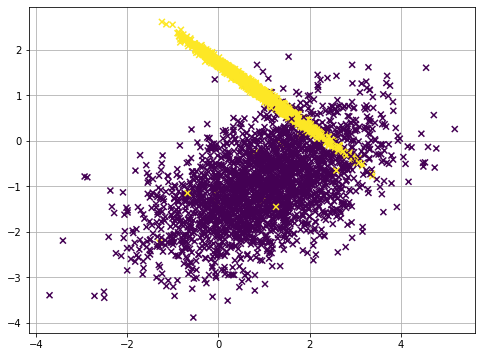

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(x=X[:,0], y=X[:,1], c=y, marker='x', zorder=2)
plt.grid();

In [72]:
def plot_limite(X, y, trained_model):
    
    plt.figure(figsize=(8, 8))
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .2),
                         np.arange(y_min, y_max, .2))
    
    if hasattr(trained_model, 'decision_function'):
       # distancia al hiperplano
       Z = trained_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
       # probabilidad de pertenencia a las clases (0, 1)
       Z = trained_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=.8)
    plt.scatter(X[:, 0], X[:, 1], 
                c=y,
                cmap=ListedColormap(['#FF0000', '#0000FF']),
                edgecolors='k')
    
    plt.title('decision boundary')
    plt.text(xx.max() - .3, 
             yy.min() + .3, 
             (f'Score: {trained_model.score(X, y):.2f}').lstrip('0'),
             size=10, horizontalalignment='right')

In [73]:
X_train, X_test, y_train, y_test=tts(X,y)

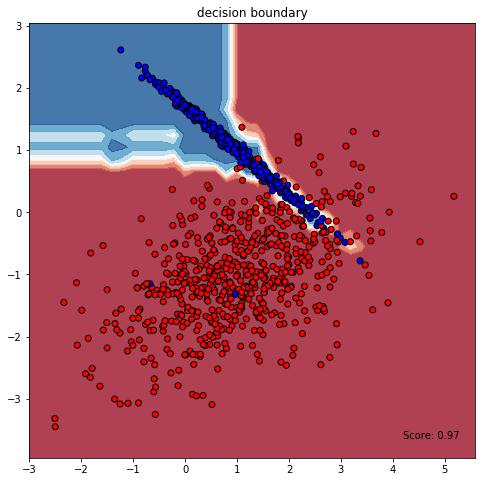

In [74]:
modelo=LGBMC().fit(X_train, y_train)
plot_limite(X_test, y_test, modelo)

In [75]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LogReg

In [76]:
m1=SVC(gamma='auto', probability=True)
m2=LogReg(solver='lbfgs')

In [77]:
ensemble=VotingClassifier(estimators=[('lr', m2), ('svc', m1)],
                          voting='soft')

ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('svc',
                              SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma

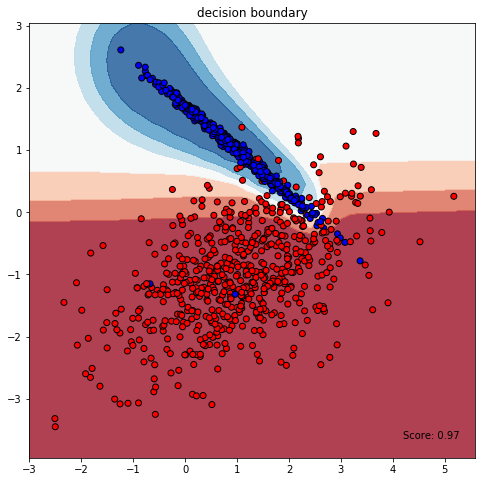

In [78]:
plot_limite(X_test, y_test, ensemble)